![Matplotlib logo](https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png)

# Additional Topics Part 2: Annotations, Colorbars, and Advanced Layouts

---
## Learning Objectives
- Learn about annotation in matplotlib
- Learn how to render math symbols in matplotlib
- Learning more about colorbars in matplotlib
- Creating a plot with a shared colorbar
- Creating a custom colorbar
- Creating subplots and merging colorbars

## Prerequisites


| Concepts | Importance |
| --- | --- |
| Basic familiarity with NumPy | Necessary |
| Basic familiarity with Matplotlib | Necessary |

- **Time to learn**: *30-40 minutes*

## Imports
Here, we import `matplotlib`, `numpy`, and `scipy` (to generate some sample data)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Normalize

## Create Some Sample Data
Using `scipy.stats`, we can create a normal distribution! Notice how nicely centered and normal our distribution is!

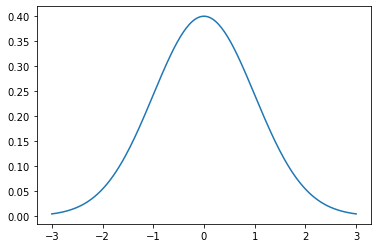

In [2]:
mu = 0
variance = 1
sigma = np.sqrt(variance)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 200)
pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf);

## Adding annotations
A common part of many people's workflows is adding annotations, or "a note of explanation or comment added to a text or diagram."

We can do this using `plt.text`.

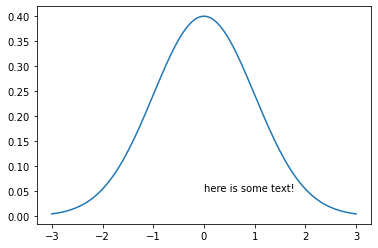

In [3]:
plt.plot(x, pdf)
plt.text(0, 0.05, 'here is some text!');

### Adding Equation Notations

We can even add **math text**, using Latex syntax. The key is use strings with following format:

```python
r'$some_equation$'
```

Here is the example equation we use!

$$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

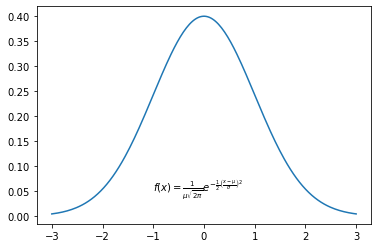

In [4]:
plt.plot(x, pdf)

plt.text(
    -1,
    0.05,
    r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$',
);

We plotted our equation! But it looks pretty small; we can increase the size of the text, and center the equation by using `fontsize` and `ha`.

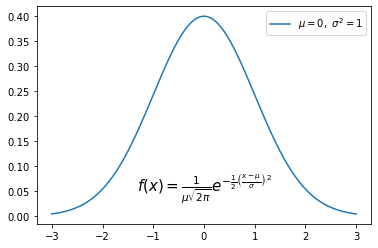

In [5]:
fstr = r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'

plt.plot(x, pdf, label=r'$\mu=0, \,\, \sigma^2 = 1$')
plt.text(0, 0.05, fstr, fontsize=15, ha='center')
plt.legend();

### Add a Box Around the Text

One other thing we can add here, for readability, is a box around the text, using `bbox`.

The `bbox` argument in `plt.text` uses a dictionary to create the box! We pass in:
* a rounded box sytle (`boxstyle = 'round'`)
* a light grey facecolor (`fc = 'lightgrey'`)
* a black edgecolor (`ec = 'k'`)

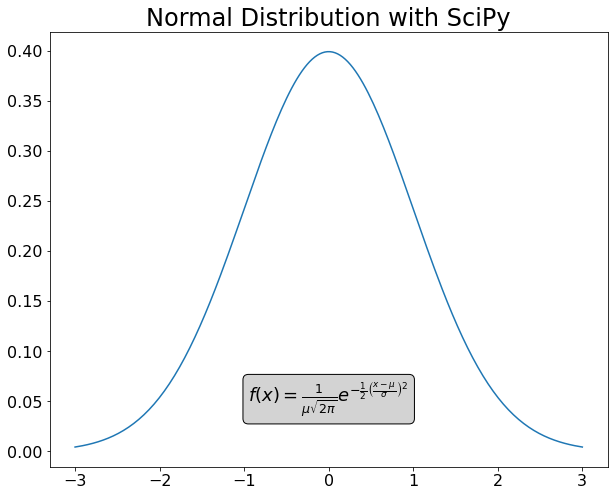

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.plot(x, pdf)

fstr = r'$f(x) = \frac{1}{\mu\sqrt{2\pi}}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$'
plt.text(
    0,
    0.05,
    fstr,
    fontsize=18,
    ha='center',
    bbox=dict(boxstyle='round', fc='lightgrey', ec='k'),
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Normal Distribution with SciPy", fontsize=24);

---

## An Overview of Colormaps

### Classes of colormaps

1. **Sequential:** change in lightness and/or saturation of color incrementally. Good for data that has ordering
![Perceptually Sequential](images/perceptually-sequential.png)
![Sequential](images/sequential.png)
![Sequential2](images/sequential2.png)

![Perceptually Sequential](images/ps.png)
![Sequential](images/s1.png)
![Sequential2](images/s2.png)

1. **Diverging:** change in lightness and/or saturation of two different colors that meet in the middle at an unsaturated color. Should be used when the data has a natural zero point, such as sea level.
![Diverging](images/diverging.png)
![Diverging](images/d.png)

1. **Cyclic:** change in lightness of two different colors that meet in the middle and begin and end at an unsaturated color. Should be used for values that naturally wrap around.
![Cyclic](images/cyclic.png)
![Cyclic](images/c.png)

1. **Qualitative:** miscellaneous color. Should not be used for data that has ordering or relationships
![Qualitative](images/qualitative.png)
![Miscellanous](images/misc.png)
![Miscellanous](images/m.png)

### Other considerations

There is a lot of info about choosing colormaps that could be it's own tutorial. The most important things that I've come across is two things:
1. Color blind friendly patterns: avoiding colormaps with both red and green can account for the most common form of color blindness. The GeoCAT-examples gallery has a section devoted to picking better colormaps [here](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html#colors) that covers this.

1. Grayscale conversion: It is not uncommon for plots rendered in color to be printed in black and white, obscuring the usefulness of a chosen colormap

![hsv colormap in grayscale](images/hsv2gray.png)

- See [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for a more in depth version of this section

## Plotting a "Basic" Colorbar

Before we look at a colorbar, let's generate some fake data using `numpy.random`

In [7]:
npts = 1000
nbins = 15

x = np.random.normal(size=npts)
y = np.random.normal(size=npts)

Here, we plot a 2D histogram using our fake data, using the default colorbar "viridis"

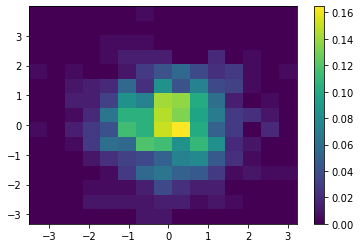

In [8]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True)
plt.colorbar();

We can change which colorbar to use by passing in `cmap = 'colorbar_name'`. We can use the "magma" colorbar instead!

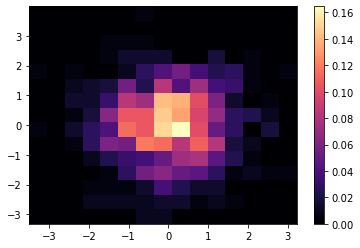

In [9]:
fig = plt.figure()
ax = plt.gca()

plt.hist2d(x, y, bins=nbins, density=True, cmap='magma')
plt.colorbar();

### Sharing Colorbars
Often times, you are not plotting a single axis. You may wish to share colorbars between different plots! We can share colorbars between two plots using the following:

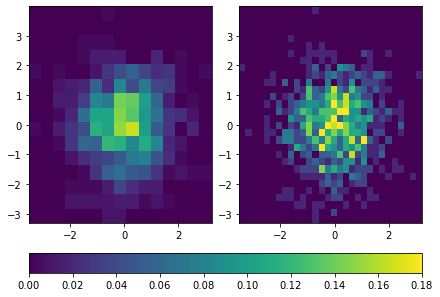

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, vmax=0.18)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, vmax=0.18)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

### Creating Your Own Colorbar

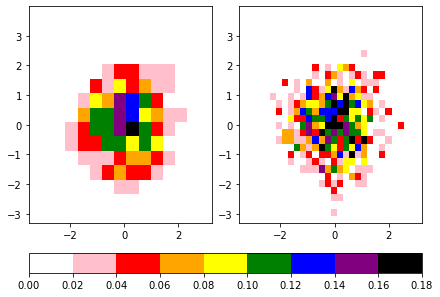

In [11]:
colors = [
    'white',
    'pink',
    'red',
    'orange',
    'yellow',
    'green',
    'blue',
    'purple',
    'black',
]
ccmap = ListedColormap(colors)
norm = Normalize(vmin=0, vmax=0.18)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=ccmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=ccmap, norm=norm)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

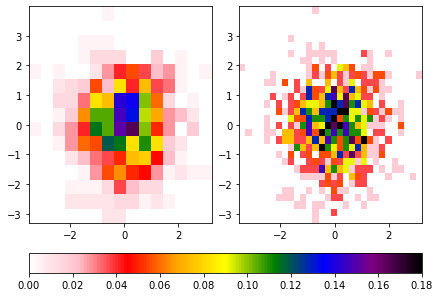

In [12]:
cbcmap = LinearSegmentedColormap.from_list("cbcmap", colors)

fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

hist1 = ax[0].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
hist2 = ax[1].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

cbar = fig.colorbar(hist1[3], ax=ax, location='bottom')

## Advanced Colorbar Sharing with Mosaic Subplots
One of the recent features added to matplotlib is `subplot_mosaic` where you can pass the structure of your figure, and it will generate your subplots automatically!

For example, if we wanted two plots on top, and one of the bottom, we can construct it using the following block of text:

```python
""
AB
CC
""
```

This corresponds to three axes: `A`, `B`, and `C` with `A` and `B` on top of `C`.

Once we create the subplots, we an access them using the resultant axes dictionary, with the syntax `axes_dict['your_axis']`. An example of this is given below!

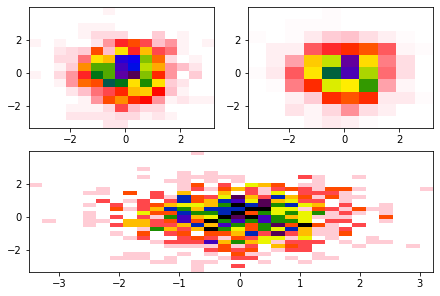

In [13]:
axdict = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CC
    """
)

histA = axdict['A'].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
histB = axdict['B'].hist2d(x, y, bins=10, density=True, cmap=cbcmap, norm=norm)
histC = axdict['C'].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

You'll notice, by default, there is not a colorbar plotted by default. When constructing the colorbar, we need to specify:
* Which plot to use for the colormapping (ex. `histA`)
* Which axes to merge colorbars across (ex. [`histA`, `histB`]
* Where to place the colorbar (ex. `bottom`)

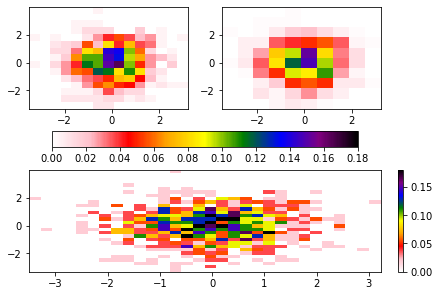

In [14]:
axdict = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    AB
    CC
    """
)

histA = axdict['A'].hist2d(x, y, bins=15, density=True, cmap=cbcmap, norm=norm)
histB = axdict['B'].hist2d(x, y, bins=10, density=True, cmap=cbcmap, norm=norm)
histC = axdict['C'].hist2d(x, y, bins=30, density=True, cmap=cbcmap, norm=norm)

plt.colorbar(histA[3], ax=[axdict['A'], axdict['B']], location='bottom')
plt.colorbar(histC[3], ax=[axdict['C']], location='right');

---

## Summary
* You can use features in `matplotlib` to add annotations, even math, to your plots
* There are a number of considerations to take into account when choosing your colormap
* You can create your own colormaps with `matplotlib`
* Various axes in figures can share colorbars
    
## Additional Resources
- [Matplotlib text documentation](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.set_math_fontfamily)
- [Matplotlib annotation documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)
- [Matplotlib's annotation examples](https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py)
- [Writing mathmatical expressions in matplotlib](https://matplotlib.org/stable/tutorials/text/mathtext.html)
- [Mathtext Examples](https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_examples.html#sphx-glr-gallery-text-labels-and-annotations-mathtext-examples-py)
- [Drawing fancy boxeas with matplotlib](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)
- [Plot Types Cheat Sheet](https://lnkd.in/dD5fE8V)
- [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Making custom colormaps](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html)
- [Complex figure and subplot composition](https://matplotlib.org/stable/tutorials/provisional/mosaic.html#)